<div class = "jumbotron jumbotron-fluid text-center">
    <h1 class = "display-1">3D World to 2D Digital Image Transformation</h1>
        <h4 class = "display-4 text-italic">Assignment for the course on Image Processing as a part of Master of Statistics (M. Stat.) curriculum</h4>
    <h3 class = "lead">Subhrajyoty Roy</h3>
    <h3 class = "lead">Roll: MB1911</h3>
</div>

# Introduction

Before performing any kind of image processing on a digital image, a 2-dimensional digital image must be captured to represent a part of the 3-dimensional world. However, depending on the position of the camera and the 3-dimensional object that is being captured, the depth information could be lost. In this assignment, I shall show the effect of the position of the pinhole camera on the captured 2-dimensional image of a static 3-dimensional cube. 

We first start by importing the necessary package for plotting and displaying the image. 

In [1]:
import matplotlib.pyplot as plt

# From 3d coordinate to 2d coordinate

Let, $P = (P_x, P_y, P_z)$ be point that we are trying to capture in the image, $C = (v_x, v_y, v_z)$ denotes the position of the camera, $f$ is the focal distance of the camera. The focal distance is the distance between the camera and the image plane. In this scenario, we assume that the image plane is parallel to the $xy$-plane, and is given by the equation $z = v_z + f$.
Therefore, the image of the point $P$ will be captured at the intersecting point between the image plane $z = v_z + f$ and the straight line joining the points $P$ and $C$. 

Using the properties of similar triangle, we see that if the 2d point of image is denoted by $(i_x, i_y)$, then

$$
\dfrac{(i_x - v_x)}{(P_x - v_x)} = \dfrac{(i_y - v_y)}{(P_y - v_y)} = \dfrac{(v_z + f - v_z)}{(P_z - v_z)}
$$

i.e.

$$
\dfrac{(i_x - v_x)}{(P_x - v_x)} = \dfrac{(i_y - v_y)}{(P_y - v_y)} = \dfrac{f}{(P_z - v_z)}
$$

Hence,

$$
i_x = v_x + \dfrac{(P_x - v_x)}{(P_z - v_z)} f \qquad \text{ and } \qquad i_y = v_y + \dfrac{(P_y - v_y)}{(P_z - v_z)} f
$$

The following function `From3Dto2D` uses this formula to compute the position of a 3d point object on the image plane as captured by the camera, given the input of the coordinates of the 3d point object, the coordinate of the camera in the 3d space and the focal length of the camera.

In [2]:
def From3Dto2D(point, camera, f):
    """
        - point is a 3 element vector denoting the coordinate of the point whose projection onto the image plane is needed
        - camera is a 3 element vector of camera coordinates in 3D world
        - f is the focal length
    """
    imageX = ((point[0] - camera[0]) * f / (point[2] - camera[2]) ) + point[0]
    imageY = ((point[1] - camera[1]) * f / (point[2] - camera[2]) ) + point[1]
    return (imageX, imageY)

# Image of a Cube

The following function `persp_calc` uses `From3Dto2D` function to project the corners of a cube of length $2$ units, centered at the origin and then outputs the 2d coordinate of the corner vertices of that cube on the image plane. It also outputs the edges which are to be created for the cube to be formed on the image plane.

In [4]:
def persp_calc(vx, vy, vz, f):
    """
        (vx, vy, vz) denotes the coordinate of the pinhole camera
        f is the focal distance, i.e. the distance between the camera and the image plane
        We consider the cube as the unit cube with center at origin, i.e. with vertices
            - A (-1, -1, -1)
            - B (1, -1, -1), C (-1, 1, -1), D (-1, -1, 1)
            - E (1, 1, -1), F (-1, 1, 1), G (1, -1, 1)
            - H (1, 1, 1)
    """
    # vertices of the cube
    cube_vertices = [[-1, -1, -1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1], [1, 1, -1], [-1, 1, 1], [1, -1, 1], [1, 1, 1]]
    res = [From3Dto2D(point, [vx, vy, vz], f) for point in cube_vertices]   # the projection of each vertices
    
    edges = []  # stores the edges of the cube
    
    for i in range(len(cube_vertices)):
        for j in range(len(cube_vertices)):
            vertex1 = cube_vertices[i]
            vertex2 = cube_vertices[j]

            # count if there is exactly two coordinate matches, then they are joined by a line, so there is an edge
            match_coord = 0
            for k in range(3):
                if vertex1[k] == vertex2[k]:
                    match_coord += 1
            if match_coord == 2:
                edges.append( ([res[i][0], res[j][0]], [res[i][1], res[j][1]]) )

    # return the vertices and the edges to plot
    return {'Vertex' : res, 'Edge' : edges}

Let us now use this function to take a picture of the cube with a camera at the point $(3, 3, 3)$ of focal length 0.5.

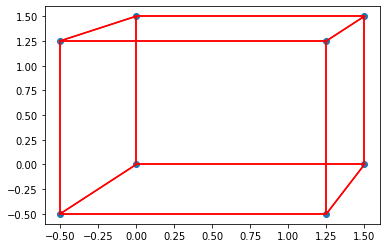

In [8]:
output = persp_calc(3, 3, 3, 0.5)

plt.scatter([p[0] for p in output['Vertex']], [p[1] for p in output['Vertex']])
for edge in output['Edge']:
    plt.plot(edge[0], edge[1], color = 'r')
plt.show()

# Effect of Camera Position

Let us now change the camera position in different areas and see how the image changes. For this, we fix the focal length at $0.5$ units for now.

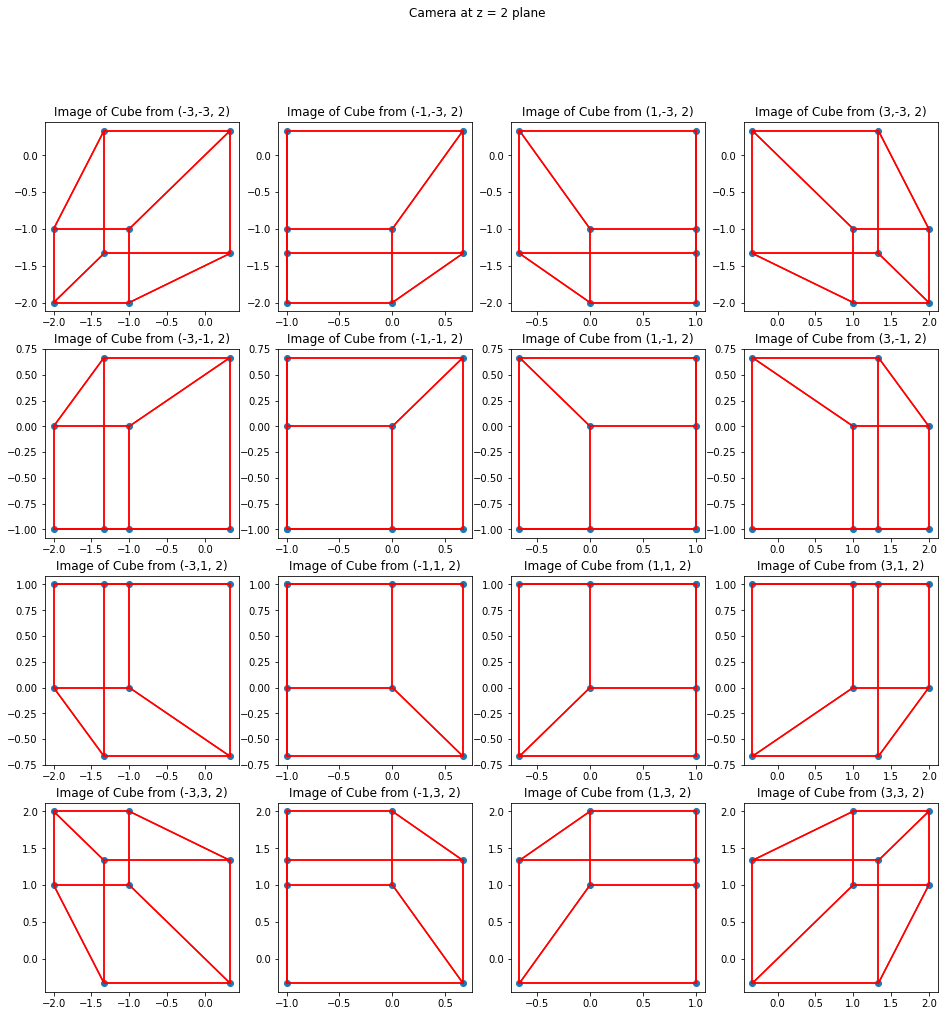

In [22]:
vertexlist = [-3, -1, 1, 3]

fig, axs = plt.subplots(4, 4, figsize = (16, 16))
for i in range(4):
    for j in range(4):
        output = persp_calc(vertexlist[i], vertexlist[j], 2, 0.5)
        axs[j, i].scatter([p[0] for p in output['Vertex']], [p[1] for p in output['Vertex']])
        for edge in output['Edge']:
            axs[j, i].plot(edge[0], edge[1], color = 'r')
        axs[j, i].set_title('Camera position (' + str(vertexlist[i]) +',' + str(vertexlist[j]) + ', 2)') 

fig.suptitle('Camera at z = 2 plane')
plt.show()

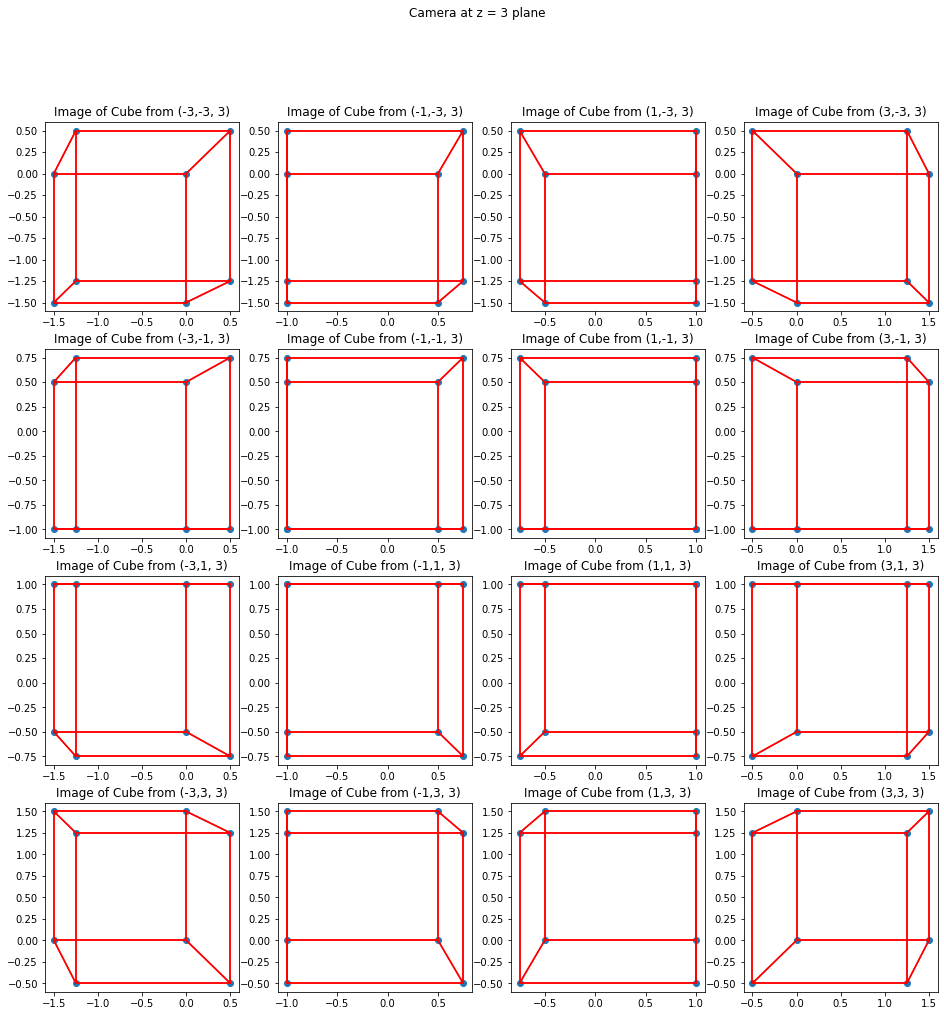

In [23]:
vertexlist = [-3, -1, 1, 3]

fig, axs = plt.subplots(4, 4, figsize = (16, 16))
for i in range(4):
    for j in range(4):
        output = persp_calc(vertexlist[i], vertexlist[j], 3, 0.5)
        axs[j, i].scatter([p[0] for p in output['Vertex']], [p[1] for p in output['Vertex']])
        for edge in output['Edge']:
            axs[j, i].plot(edge[0], edge[1], color = 'r')
        axs[j, i].set_title('Camera position (' + str(vertexlist[i]) +',' + str(vertexlist[j]) + ', 3)') 

fig.suptitle('Camera at z = 3 plane')
plt.show()

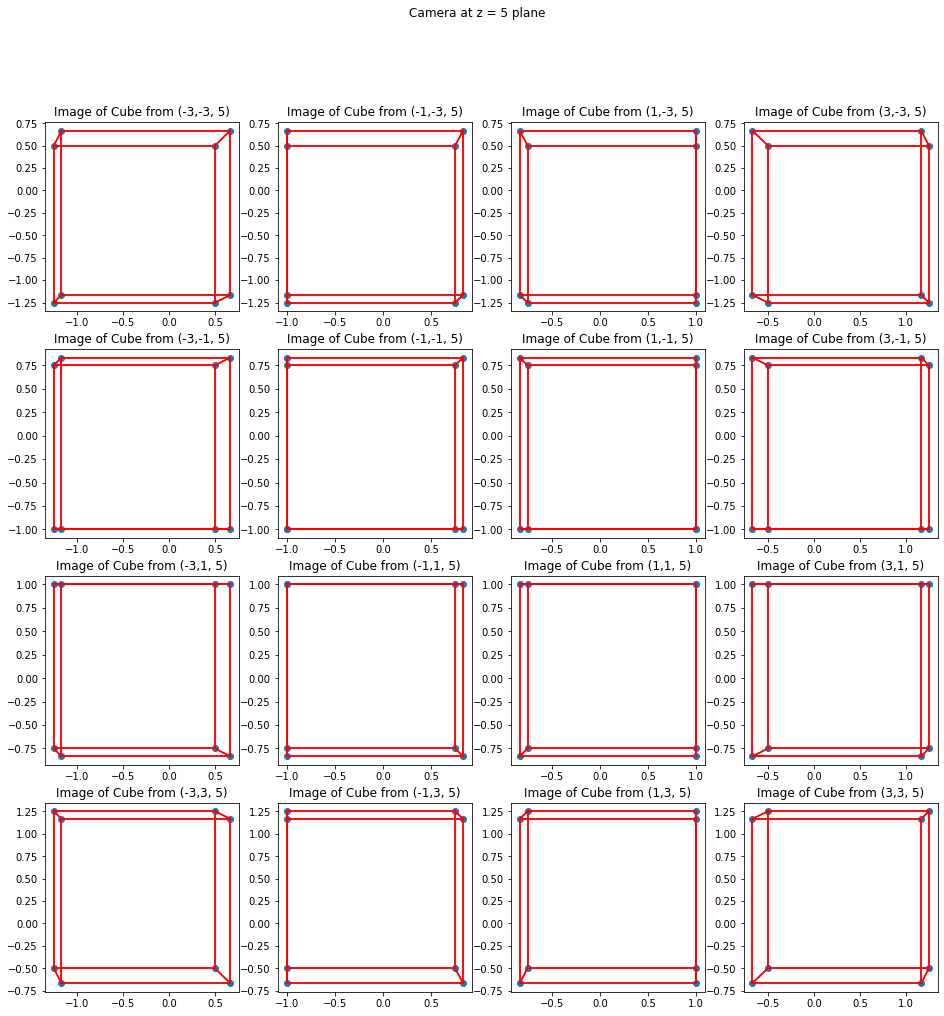

In [24]:
vertexlist = [-3, -1, 1, 3]

fig, axs = plt.subplots(4, 4, figsize = (16, 16))
for i in range(4):
    for j in range(4):
        output = persp_calc(vertexlist[i], vertexlist[j], 5, 0.5)
        axs[j, i].scatter([p[0] for p in output['Vertex']], [p[1] for p in output['Vertex']])
        for edge in output['Edge']:
            axs[j, i].plot(edge[0], edge[1], color = 'r')
        axs[j, i].set_title('Camera position (' + str(vertexlist[i]) +',' + str(vertexlist[j]) + ', 5)') 

fig.suptitle('Camera at z = 5 plane')
plt.show()

It seems that change in the $z$-coordinate of the camera position changes the shape of the cube, as $v_z$ is smaller, the cube becomes longer and longer, while at high values of $v_z$, the cube becomes flatter. On the other hand, the $x$ and $y$ coordinates seem to affect the orientation of the cube in the 2d image, as $v_x$ changes, the cube orientation shifts from left to right, and as $v_y$ changes, the cube orientation moves from up to bottom.


# Effect of Focal Length

The following figure shows the effect of the focal length of the camera. In this case, we consider the camera position fixed at $(3, 3, 3)$ while the focal length is changed.

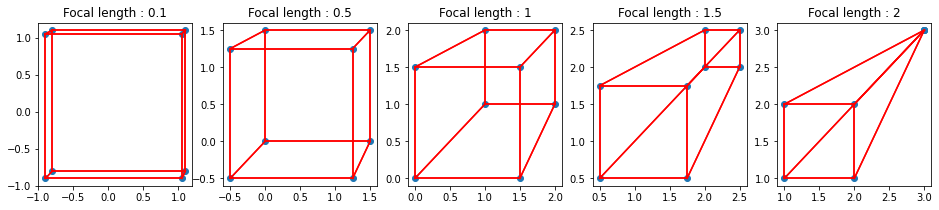

In [33]:
focal_length = [0.1, 0.5, 1, 1.5, 2]

fig, axs = plt.subplots(ncols = 5, figsize = (16, 3))
for i in range(5):
    output = persp_calc(3, 3, 3, focal_length[i])
    axs[i].scatter([p[0] for p in output['Vertex']], [p[1] for p in output['Vertex']])
    for edge in output['Edge']:
        axs[i].plot(edge[0], edge[1], color = 'r')
    axs[i].set_title('Focal length : ' + str(focal_length[i])) 
plt.show()

As we see, as the focal length increases, the cube becomes longer and longer. In order words, the vanishing point turns out to come in the 2d image itself as the focal length increases, as shown in the case for focal length equal to 2.


# Thank you